# Construct Dataset

In [1]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.types.timeseries import load_timeseries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

#import data functions
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.defs.generate_data import gw, visualize, bol, burried_gw
from ipynb.fs.defs.mass_sampling import mass_sample

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Trial 3B for regression! Following are the difference
- sampling method back to uniform
- noise increased
    - add in snr 10-200

In [2]:
mass = []

for i in np.arange(16000):
    m = [uniform(10,100),uniform(10,100)]
    m.sort()
    mass.append(m)

mass_df = pd.DataFrame(mass, columns = ["m1","m2"])

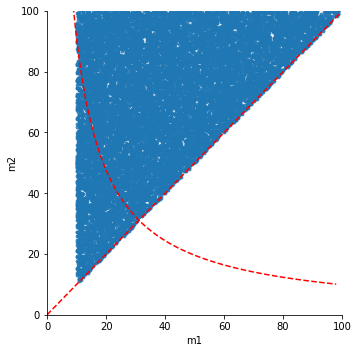

In [3]:
# Create scatterplot of dataframe
sns.lmplot('m1', 'm2', data=mass_df, fit_reg=False, 
           scatter_kws={"s": 8})
plt.ylim(0,100)
plt.xlim(0,100)

plt.plot(np.arange(100),'r--')
plt.plot(1000/np.arange(1,100),'r--')
plt.show()

Unexpected finding: for length to be less than around 0.8, we have the range of masses constrained by the above 2 functions!

In [4]:
# Generate data of pure gw 
X = []
y = mass_df

for i in tqdm(range(len(mass))):
    wf = burried_gw(mass_df.loc[i,'m1'], mass_df.loc[i,'m2'], uniform(10,200))
    X.append(np.asarray(wf))
    

100%|██████████| 16000/16000 [31:41<00:00,  8.69it/s] 


In [5]:
# Save as dataframe
X_df = pd.DataFrame(X)

In [6]:
# Since sklearn makes things a lot easier, can just store the whole data and split every time. 
# If want to recreate the split just use same random seed
# write data into the same file under different keys

# '''ALREADY DONE NO NEED REPEAT
f_path = 'r_data_3B.h5'
X_df.to_hdf(f_path, key='X', mode='w')
y.to_hdf(f_path, key='y')
#'''

# DONE!